In [1]:
import pandas as pd
import numpy as np

In [2]:
df_input = pd.read_csv("data/서울교통공사 2020년 일별 시간대별 역별 승하차 인원(1_8호선).csv", encoding="cp949")
df_input.head()

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2286,2354,2261,1922,1696,1620,1181,768,426,77
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,873,1019,1234,1383,1271,1061,991,572,217,2
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,885,783,849,602,435,293,273,174,149,26
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1636,1748,1890,1879,1827,1955,1800,1259,406,6


In [3]:
df_input.columns

Index(['날짜', '호선', '역번호', '역명', '구분', '06:00 이전', '06:00 ~ 07:00',
       '07:00 ~ 08:00', '08:00 ~ 09:00', '09:00 ~ 10:00', '10:00 ~ 11:00',
       '11:00 ~ 12:00', '12:00 ~ 13:00', '13:00 ~ 14:00', '14:00 ~ 15:00',
       '15:00 ~ 16:00', '16:00 ~ 17:00', '17:00 ~ 18:00', '18:00 ~ 19:00',
       '19:00 ~ 20:00', '20:00 ~ 21:00', '21:00 ~ 22:00', '22:00 ~ 23:00',
       '23:00 ~ 24:00', '24:00 이후'],
      dtype='object')

In [4]:
df_melt = df_input.melt(id_vars=['날짜', '호선', '역번호', '역명', '구분'], var_name="시간", value_name="승하차인원")
df_melt.head()

,날짜,호선,역번호,역명,구분,시간,승하차인원
0,2020-01-01,1호선,150,서울역,승차,06:00 이전,356
1,2020-01-01,1호선,150,서울역,하차,06:00 이전,235
2,2020-01-01,1호선,151,시청,승차,06:00 이전,105
3,2020-01-01,1호선,151,시청,하차,06:00 이전,81
4,2020-01-01,1호선,152,종각,승차,06:00 이전,798


In [5]:
df_melt.isnull().sum()

날짜       0
호선       0
역번호      0
역명       0
구분       0
시간       0
승하차인원    0
dtype: int64

In [6]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045600 entries, 0 to 4045599
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   호선      object
 2   역번호     int64 
 3   역명      object
 4   구분      object
 5   시간      object
 6   승하차인원   int64 
dtypes: int64(2), object(5)
memory usage: 216.1+ MB


In [7]:
df_melt.groupby(["날짜", "역번호", "시간"]).sum()

승하차인원
날짜         역번호  시간                  
2020-01-01 150  06:00 ~ 07:00   1232
                06:00 이전         591
                07:00 ~ 08:00   1141
                08:00 ~ 09:00   1817
                09:00 ~ 10:00   2617
...                              ...
2020-12-31 2827 20:00 ~ 21:00    157
                21:00 ~ 22:00    211
                22:00 ~ 23:00     84
                23:00 ~ 24:00     31
                24:00 이후           3

[2022800 rows x 1 columns]

In [8]:
df_melt.shape

(4045600, 7)

* warning : df_calc = df_melt.loc[df_melt["구분"]=="승차", :]

* solution : df_calc = df_melt.loc[df_melt["구분"]=="승차", :].copy()

* .loc은 복사하는 게 아니라 원래 dataframe을 반환하므로, copy()를 통해 복사해주어야 한다!

In [9]:
df_calc = df_melt.loc[df_melt["구분"]=="승차", :].copy()
df_calc.head()

,날짜,호선,역번호,역명,구분,시간,승하차인원
0,2020-01-01,1호선,150,서울역,승차,06:00 이전,356
2,2020-01-01,1호선,151,시청,승차,06:00 이전,105
4,2020-01-01,1호선,152,종각,승차,06:00 이전,798
6,2020-01-01,1호선,153,종로3가,승차,06:00 이전,338
8,2020-01-01,1호선,154,종로5가,승차,06:00 이전,60


* https://leedakyeong.tistory.com/entry/Python-Pandas-Tutorial-groupby-transform-groupby-%EA%B2%B0%EA%B3%BC-%EC%BB%AC%EB%9F%BC%EC%97%90-%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0
* 이 링크는 원래 하고싶었던 건데, transform으로 한번에 dataframe에 열 추가함.
* 안돼서 그냥 np array를 반환받아서 추가해줌.
* 강의를 통해 solution 확인함.
<ul>
    <li>구버전 sol) numpy 배열을 받아 column에 추가 <br>
        n = df_melt.groupby(by=["날짜", "역번호", "시간"]).sum().values<br>
        df_calc["이동량"] = n<br>
    <li>신버전 sol) index를 새로 받아 column에 추가 <br>
        df_moving = n.reset_index() <br>
        df_moving = df_moving.rename(columns={"승하차인원":"이동량"}) <br>
        df_moving["이동량"] = df_moving["이동량"].fillna(0) <br>
        df_calc = pd.merge(df_moving, df_calc) <br>
    <li>deleted <br>
        df_calc["이동량"] = n<br>
        *df_calc["이동량"] = df_moving["이동량"].copy()

In [10]:
df_melt.groupby(by=["날짜", "역번호", "시간"]).sum()

승하차인원
날짜         역번호  시간                  
2020-01-01 150  06:00 ~ 07:00   1232
                06:00 이전         591
                07:00 ~ 08:00   1141
                08:00 ~ 09:00   1817
                09:00 ~ 10:00   2617
...                              ...
2020-12-31 2827 20:00 ~ 21:00    157
                21:00 ~ 22:00    211
                22:00 ~ 23:00     84
                23:00 ~ 24:00     31
                24:00 이후           3

[2022800 rows x 1 columns]

In [11]:
n = df_melt.groupby(by=["날짜", "역번호", "시간"]).sum()
df_moving = n.reset_index()
df_moving = df_moving.rename(columns={"승하차인원":"이동량"})

In [13]:
print(df_moving.info())
print(df_calc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022800 entries, 0 to 2022799
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   역번호     int64 
 2   시간      object
 3   이동량     int64 
dtypes: int64(2), object(2)
memory usage: 61.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022800 entries, 0 to 4045598
Data columns (total 7 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   호선      object
 2   역번호     int64 
 3   역명      object
 4   구분      object
 5   시간      object
 6   승하차인원   int64 
dtypes: int64(2), object(5)
memory usage: 123.5+ MB
None


In [16]:
df_moving["이동량"] = df_moving["이동량"].fillna(0)
df_calc = pd.merge(df_moving, df_calc)
df_calc.head()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원
0,2020-01-01,150,06:00 ~ 07:00,1232,1호선,서울역,승차,280
1,2020-01-01,150,06:00 이전,591,1호선,서울역,승차,356
2,2020-01-01,150,07:00 ~ 08:00,1141,1호선,서울역,승차,313
3,2020-01-01,150,08:00 ~ 09:00,1817,1호선,서울역,승차,774
4,2020-01-01,150,09:00 ~ 10:00,2617,1호선,서울역,승차,923


* 결측값이 있어서 이동량이 float형으로 들어감.
* 이동량이 0인 것이 결측값으로 측정된 것이므로 0으로 바꾼 후 int형으로 변환하는 작업 필요
* df_moving에서 null값을 채우면 df_calc에서는 int형으로 바꾸는 작업 안해도됨.
* dataframe을 합칠 때는 concat이나 merge를 사용하지만,
* merge로 합쳐야 값을 비교해서 같은 값이 있는 행에 데이터를 넣어준다.
* https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
* 현재 Pandas 형태의 data이므로, pandas의 fillna() 메서드 사용

In [17]:
df_calc.loc[df_calc["이동량"]==0, "시간"].value_counts(ascending=False)

24:00 이후         9658
10:00 ~ 11:00     202
15:00 ~ 16:00     201
09:00 ~ 10:00     200
07:00 ~ 08:00     199
12:00 ~ 13:00     199
11:00 ~ 12:00     199
08:00 ~ 09:00     198
20:00 ~ 21:00     198
18:00 ~ 19:00     198
06:00 이전          198
22:00 ~ 23:00     198
06:00 ~ 07:00     198
16:00 ~ 17:00     197
23:00 ~ 24:00     197
21:00 ~ 22:00     197
19:00 ~ 20:00     196
17:00 ~ 18:00     196
14:00 ~ 15:00     196
13:00 ~ 14:00     195
Name: 시간, dtype: int64

In [18]:
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022800 entries, 0 to 2022799
Data columns (total 8 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   역번호     int64 
 2   시간      object
 3   이동량     int64 
 4   호선      object
 5   역명      object
 6   구분      object
 7   승하차인원   int64 
dtypes: int64(3), object(5)
memory usage: 138.9+ MB


In [19]:
df_calc = df_calc.reset_index(drop=True)
df_calc.head()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원
0,2020-01-01,150,06:00 ~ 07:00,1232,1호선,서울역,승차,280
1,2020-01-01,150,06:00 이전,591,1호선,서울역,승차,356
2,2020-01-01,150,07:00 ~ 08:00,1141,1호선,서울역,승차,313
3,2020-01-01,150,08:00 ~ 09:00,1817,1호선,서울역,승차,774
4,2020-01-01,150,09:00 ~ 10:00,2617,1호선,서울역,승차,923


In [20]:
def modify_time(time):
    if time == "06:00 이전":
        t = 5
    else:
        t = time[:2]
        t = int(t)
    return t
time1 = '06:00 이전'
time2 = '06:00 ~ 07:00'
time3 = '22:00 ~ 23:00'
print(modify_time(time1), modify_time(time2), modify_time(time3))
print(type(modify_time(time1)), type(modify_time(time2)), type(modify_time(time3)))

5 6 22
<class 'int'> <class 'int'> <class 'int'>


In [21]:
df_calc["시간"] = df_calc["시간"].apply(modify_time)
df_calc.head()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원
0,2020-01-01,150,6,1232,1호선,서울역,승차,280
1,2020-01-01,150,5,591,1호선,서울역,승차,356
2,2020-01-01,150,7,1141,1호선,서울역,승차,313
3,2020-01-01,150,8,1817,1호선,서울역,승차,774
4,2020-01-01,150,9,2617,1호선,서울역,승차,923


In [22]:
def parse_year(date):
    y = date.split('-')[0]
    y = int(y)
    return y
def parse_month(date):
    m = date.split('-')[1]
    m = int(m)
    return m
def parse_date(date):
    d = date.split('-')[-1]
    d = int(d)
    return d
date = '2020-01-02'
parse_date(date)

2

In [23]:
df_calc["연도"] = df_calc["날짜"].apply(parse_year)
df_calc.tail()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도
2022795,2020-12-31,2827,20,157,8호선,모란,승차,86,2020
2022796,2020-12-31,2827,21,211,8호선,모란,승차,112,2020
2022797,2020-12-31,2827,22,84,8호선,모란,승차,45,2020
2022798,2020-12-31,2827,23,31,8호선,모란,승차,6,2020
2022799,2020-12-31,2827,24,3,8호선,모란,승차,0,2020


In [24]:
df_calc["월"] = df_calc["날짜"].apply(parse_month)
df_calc.tail()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월
2022795,2020-12-31,2827,20,157,8호선,모란,승차,86,2020,12
2022796,2020-12-31,2827,21,211,8호선,모란,승차,112,2020,12
2022797,2020-12-31,2827,22,84,8호선,모란,승차,45,2020,12
2022798,2020-12-31,2827,23,31,8호선,모란,승차,6,2020,12
2022799,2020-12-31,2827,24,3,8호선,모란,승차,0,2020,12


In [25]:
df_calc["일"] = df_calc["날짜"].apply(parse_date)
df_calc.tail()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일
2022795,2020-12-31,2827,20,157,8호선,모란,승차,86,2020,12,31
2022796,2020-12-31,2827,21,211,8호선,모란,승차,112,2020,12,31
2022797,2020-12-31,2827,22,84,8호선,모란,승차,45,2020,12,31
2022798,2020-12-31,2827,23,31,8호선,모란,승차,6,2020,12,31
2022799,2020-12-31,2827,24,3,8호선,모란,승차,0,2020,12,31


In [26]:
def parse_lines(line):
    l = line.replace("호선", "")
    l = int(l)
    return l
l = '8호선'
parse_lines(l)

8

In [27]:
df_calc["호선"] = df_calc["호선"].apply(parse_lines)
df_calc.tail()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일
2022795,2020-12-31,2827,20,157,8,모란,승차,86,2020,12,31
2022796,2020-12-31,2827,21,211,8,모란,승차,112,2020,12,31
2022797,2020-12-31,2827,22,84,8,모란,승차,45,2020,12,31
2022798,2020-12-31,2827,23,31,8,모란,승차,6,2020,12,31
2022799,2020-12-31,2827,24,3,8,모란,승차,0,2020,12,31


### 주말/주중 구분 column 만들기

In [28]:
df_calc["날짜변환"] = pd.to_datetime(df_calc["날짜"])
df_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022800 entries, 0 to 2022799
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      object        
 1   역번호     int64         
 2   시간      int64         
 3   이동량     int64         
 4   호선      int64         
 5   역명      object        
 6   구분      object        
 7   승하차인원   int64         
 8   연도      int64         
 9   월       int64         
 10  일       int64         
 11  날짜변환    datetime64[ns]
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 185.2+ MB


In [29]:
type(df_calc["날짜변환"])

pandas.core.series.Series

* https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html
* pd.to_datetime()으로 type을 datetime으로 바꿔주면, 위 링크에서 사용가능한 메서드들을 확인할 수 있다.

In [30]:
df_calc["날짜변환"].dt.dayofweek.value_counts()

3    293020
2    292960
0    287560
4    287420
1    287340
5    287280
6    287220
Name: 날짜변환, dtype: int64

* https://rfriend.tistory.com/291
* boolean indexing 할 때 2개 이상의 조건문을 사용하고 싶을 때
* python과는 다르게 | 혹은 &를 이용해서 연결해준다.

In [31]:
df_calc["요일"] = df_calc["날짜변환"].dt.day_name()
df_calc.head()

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일,날짜변환,요일
0,2020-01-01,150,6,1232,1,서울역,승차,280,2020,1,1,2020-01-01,Wednesday
1,2020-01-01,150,5,591,1,서울역,승차,356,2020,1,1,2020-01-01,Wednesday
2,2020-01-01,150,7,1141,1,서울역,승차,313,2020,1,1,2020-01-01,Wednesday
3,2020-01-01,150,8,1817,1,서울역,승차,774,2020,1,1,2020-01-01,Wednesday
4,2020-01-01,150,9,2617,1,서울역,승차,923,2020,1,1,2020-01-01,Wednesday


* ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
* 대부분 문제는 and, or 연산자를 쓰면 안된다고 하고, &, |로 바꿔서 사용하라고 함.
* 그러나 바꿔도 오류발생.
* http://daplus.net/python-%EC%8B%9C%EB%A6%AC%EC%A6%88%EC%9D%98-%EC%A7%84%EC%8B%A4-%EA%B0%80%EC%B9%98%EB%8A%94-%EB%AA%A8%ED%98%B8%ED%95%A9%EB%8B%88%EB%8B%A4-a-empty-a-bool-a-item-a-any-%EB%98%90%EB%8A%94-a/
* np.logical_or('Saturday','Sunday')를 사용해도 오류 발생.
* UFuncTypeError: ufunc 'logical_or' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> dtype('bool')
* 내가 봤을 때는 iterator에 &, |, 혹은 np연산자를 사용하면 오류가 발생하는 것 같다.
* https://nittaku.tistory.com/111
* https://rfriend.tistory.com/291
* .loc[]를 사용하여 값을 바꾸는 예제가 있어서 이걸 사용하기로 함.

In [32]:
k = (df_calc["요일"] == 'Saturday') | (df_calc["요일"] == 'Sunday')
df_calc.loc[k, :]

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일,날짜변환,요일
16500,2020-01-04,150,6,1672,1,서울역,승차,321,2020,1,4,2020-01-04,Saturday
16501,2020-01-04,150,5,658,1,서울역,승차,363,2020,1,4,2020-01-04,Saturday
16502,2020-01-04,150,7,2406,1,서울역,승차,586,2020,1,4,2020-01-04,Saturday
16503,2020-01-04,150,8,3362,1,서울역,승차,1310,2020,1,4,2020-01-04,Saturday
16504,2020-01-04,150,9,4670,1,서울역,승차,1776,2020,1,4,2020-01-04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000595,2020-12-27,2827,20,127,8,모란,승차,78,2020,12,27,2020-12-27,Sunday
2000596,2020-12-27,2827,21,141,8,모란,승차,68,2020,12,27,2020-12-27,Sunday
2000597,2020-12-27,2827,22,52,8,모란,승차,20,2020,12,27,2020-12-27,Sunday
2000598,2020-12-27,2827,23,31,8,모란,승차,14,2020,12,27,2020-12-27,Sunday


In [33]:
df_calc.loc[~k, "요일"] = "N"
df_calc.loc[~k, :]

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일,날짜변환,요일
0,2020-01-01,150,6,1232,1,서울역,승차,280,2020,1,1,2020-01-01,N
1,2020-01-01,150,5,591,1,서울역,승차,356,2020,1,1,2020-01-01,N
2,2020-01-01,150,7,1141,1,서울역,승차,313,2020,1,1,2020-01-01,N
3,2020-01-01,150,8,1817,1,서울역,승차,774,2020,1,1,2020-01-01,N
4,2020-01-01,150,9,2617,1,서울역,승차,923,2020,1,1,2020-01-01,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022795,2020-12-31,2827,20,157,8,모란,승차,86,2020,12,31,2020-12-31,N
2022796,2020-12-31,2827,21,211,8,모란,승차,112,2020,12,31,2020-12-31,N
2022797,2020-12-31,2827,22,84,8,모란,승차,45,2020,12,31,2020-12-31,N
2022798,2020-12-31,2827,23,31,8,모란,승차,6,2020,12,31,2020-12-31,N


In [34]:
df_calc.loc[k, "요일"] = "M"
df_calc.loc[k, :]

,날짜,역번호,시간,이동량,호선,역명,구분,승하차인원,연도,월,일,날짜변환,요일
16500,2020-01-04,150,6,1672,1,서울역,승차,321,2020,1,4,2020-01-04,M
16501,2020-01-04,150,5,658,1,서울역,승차,363,2020,1,4,2020-01-04,M
16502,2020-01-04,150,7,2406,1,서울역,승차,586,2020,1,4,2020-01-04,M
16503,2020-01-04,150,8,3362,1,서울역,승차,1310,2020,1,4,2020-01-04,M
16504,2020-01-04,150,9,4670,1,서울역,승차,1776,2020,1,4,2020-01-04,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000595,2020-12-27,2827,20,127,8,모란,승차,78,2020,12,27,2020-12-27,M
2000596,2020-12-27,2827,21,141,8,모란,승차,68,2020,12,27,2020-12-27,M
2000597,2020-12-27,2827,22,52,8,모란,승차,20,2020,12,27,2020-12-27,M
2000598,2020-12-27,2827,23,31,8,모란,승차,14,2020,12,27,2020-12-27,M


In [35]:
df_calc["요일"].value_counts()

N    1448300
M     574500
Name: 요일, dtype: int64

In [36]:
df_calc.columns.to_list()

['날짜',
 '역번호',
 '시간',
 '이동량',
 '호선',
 '역명',
 '구분',
 '승하차인원',
 '연도',
 '월',
 '일',
 '날짜변환',
 '요일']

In [64]:
cols = ['날짜', '연도', '월', '일', '시간', '요일', '호선', '역번호', '역명', '이동량']
cols

['날짜', '연도', '월', '일', '시간', '요일', '호선', '역번호', '역명', '이동량']

In [65]:
df = df_calc.loc[:, cols].copy()
df.head()

,날짜,연도,월,일,시간,요일,호선,역번호,역명,이동량
0,2020-01-01,2020,1,1,6,N,1,150,서울역,1232
1,2020-01-01,2020,1,1,5,N,1,150,서울역,591
2,2020-01-01,2020,1,1,7,N,1,150,서울역,1141
3,2020-01-01,2020,1,1,8,N,1,150,서울역,1817
4,2020-01-01,2020,1,1,9,N,1,150,서울역,2617


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022800 entries, 0 to 2022799
Data columns (total 9 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   연도      int64 
 1   월       int64 
 2   일       int64 
 3   시간      int64 
 4   요일      object
 5   호선      int64 
 6   역번호     int64 
 7   역명      object
 8   이동량     int64 
dtypes: int64(7), object(2)
memory usage: 138.9+ MB


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [42]:
df.head()

,연도,월,일,시간,요일,호선,역번호,역명,이동량
0,2020,1,1,6,N,1,150,서울역,1232
1,2020,1,1,5,N,1,150,서울역,591
2,2020,1,1,7,N,1,150,서울역,1141
3,2020,1,1,8,N,1,150,서울역,1817
4,2020,1,1,9,N,1,150,서울역,2617


In [43]:
t = df.pivot_table(values="이동량", columns="시간", index="호선").round()
t

시간,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
호선,,,,,,,,,,,,,,,,,,,,
1,312.0,674.0,1663.0,3566.0,2485.0,1796.0,1952.0,2083.0,2245.0,2272.0,2356.0,2360.0,2896.0,3799.0,2038.0,1361.0,1263.0,919.0,434.0,51.0
2,380.0,961.0,2411.0,4702.0,3229.0,1838.0,1683.0,1799.0,2005.0,2002.0,2158.0,2434.0,3360.0,5012.0,3198.0,2120.0,1988.0,1669.0,864.0,104.0
3,166.0,593.0,1477.0,2496.0,1704.0,1134.0,1054.0,1106.0,1195.0,1212.0,1308.0,1444.0,1920.0,2660.0,1697.0,1127.0,968.0,761.0,357.0,48.0
4,276.0,791.0,1883.0,3008.0,1978.0,1379.0,1310.0,1386.0,1487.0,1516.0,1616.0,1815.0,2298.0,3143.0,2156.0,1430.0,1257.0,1031.0,565.0,75.0
5,168.0,509.0,1377.0,2243.0,1141.0,713.0,690.0,737.0,795.0,788.0,853.0,987.0,1345.0,2085.0,1293.0,805.0,714.0,579.0,296.0,44.0
6,154.0,372.0,935.0,1508.0,872.0,577.0,552.0,600.0,640.0,634.0,683.0,789.0,995.0,1430.0,1013.0,635.0,587.0,502.0,302.0,43.0
7,257.0,622.0,1531.0,2528.0,1536.0,889.0,796.0,847.0,901.0,898.0,982.0,1121.0,1518.0,2277.0,1612.0,997.0,882.0,710.0,388.0,62.0
8,197.0,490.0,1195.0,2076.0,1177.0,714.0,678.0,721.0,770.0,778.0,860.0,969.0,1261.0,1895.0,1234.0,792.0,706.0,554.0,280.0,47.0


<AxesSubplot:xlabel='시간', ylabel='호선'>

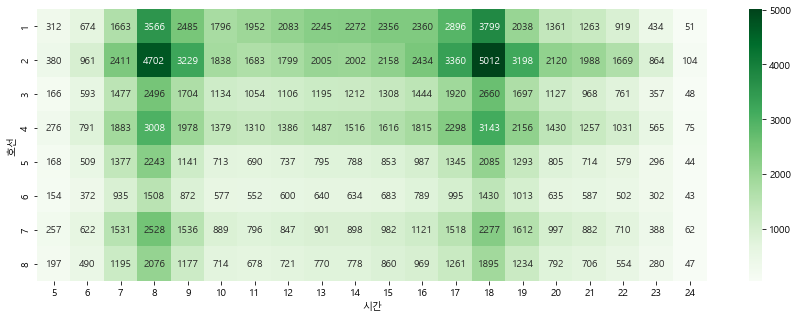

In [44]:
plt.figure(figsize=(15, 5))
sns.heatmap(t, cmap="Greens", annot=True, fmt=".0f")

* 이상하게, 승하차 인원 평균을 계산한 데이터와 이동량 평균을 계산한 데이터가 엄청난 차이를 보이는 이상현상 발생..
<ol>
    <li> 0이 결측값으로 들어가는 것 처리를 안해줌
    <li> 데이터가 같은 행에 '이동량'을 추가해줘야 하는데, 다른 데이터에 들어간 것으로 보임. merge로 dataframe을 합쳐서 해결!
</ol>
* `9:00~10:00` 과 `18:00~19:00` 사이에 이동량이 가장 많다. 예상대로 출퇴근 시간에 이동량이 가장 많음.
* 1, 2, 4호선이 이동량이 많은 것을 확인할 수 있음.

<AxesSubplot:xlabel='호선', ylabel='이동량'>

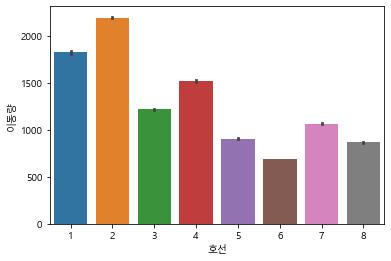

In [66]:
sns.barplot(data=df, x="호선", y="이동량")

<AxesSubplot:>

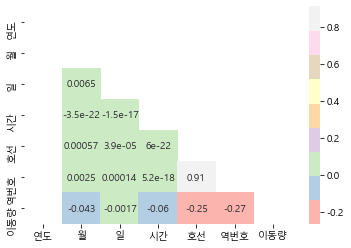

In [56]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="Pastel1", mask=mask)

<AxesSubplot:xlabel='호선', ylabel='이동량'>

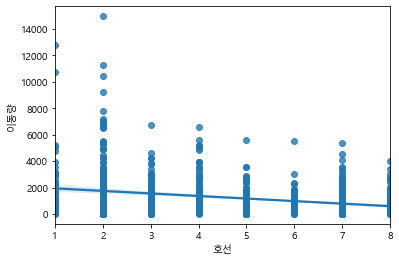

In [59]:
sns.regplot(data=df.sample(1000), x="호선", y="이동량")

<AxesSubplot:xlabel='역번호', ylabel='이동량'>

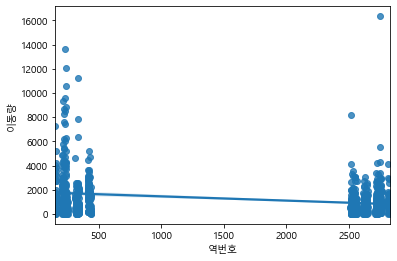

In [62]:
sns.regplot(data=df.sample(1000), x="역번호", y="이동량")

* 생각보다 호선과 이동량에는 상관관계가 없음.
* 나중에 이 dataframe에 지연시간 data를 합쳐서 상관관계를 확인해 볼 예정.

In [67]:
df.head()

,날짜,연도,월,일,시간,요일,호선,역번호,역명,이동량
0,2020-01-01,2020,1,1,6,N,1,150,서울역,1232
1,2020-01-01,2020,1,1,5,N,1,150,서울역,591
2,2020-01-01,2020,1,1,7,N,1,150,서울역,1141
3,2020-01-01,2020,1,1,8,N,1,150,서울역,1817
4,2020-01-01,2020,1,1,9,N,1,150,서울역,2617


In [69]:
df.to_csv("data/subway_moving_2020.csv", mode='w')

In [70]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: B681-174D

 C:\Users\lucyy\Subway\data 디렉터리

2021-08-25  오후 07:01    <DIR>          .
2021-08-25  오후 07:01    <DIR>          ..
2021-08-24  오후 04:34    <DIR>          .ipynb_checkpoints
2021-08-24  오후 04:29            24,667 4642번 역간거리 및 소요시간.xlsx
2021-08-25  오후 07:01       117,785,472 subway_moving_2020.csv
2021-08-24  오후 04:30        30,109,428 서울교통공사 2016년 일별 역별 시간대별 승하차인원(1_8호선).csv
2021-08-24  오후 04:30        32,617,432 서울교통공사 2017년 일별 역별 시간대별 승하차인원(1_8호선).xlsx
2021-08-24  오후 04:31        30,814,546 서울교통공사 2018년 일별 역별 시간대별 승하차인원(1_8호선).xlsx
2021-08-24  오후 04:30        30,899,528 서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).xlsx
2021-08-24  오후 04:19        23,525,978 서울교통공사 2020년 일별 시간대별 역별 승하차 인원(1_8호선).csv
2021-08-24  오후 04:29            19,431 서울교통공사_역간거리.xlsx
2021-08-24  오후 03:53            33,280 역간 거리 및 소요시간.xls
               9개 파일         265,829,762 바이트
               3개 디렉터리  28,392,329,216 바이트 남음
